In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [5]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
submission_data = pd.read_csv("./sample_submission.csv")


In [6]:
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test_data.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
train_data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train_data.shape


(614, 13)

In [11]:
train_data.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
train_data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area",
    "Credit_History",
]

In [14]:
train_data["Loan_Status"].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
for col in cat_cols:
    print(train_data[col].value_counts())
    print("------------------------------------------------")

Male      489
Female    112
Name: Gender, dtype: int64
------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    475
0.0     89
Name: Credit_History, dtype: int64
------------------------------------------------


# EDA


In [16]:
train_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot: >

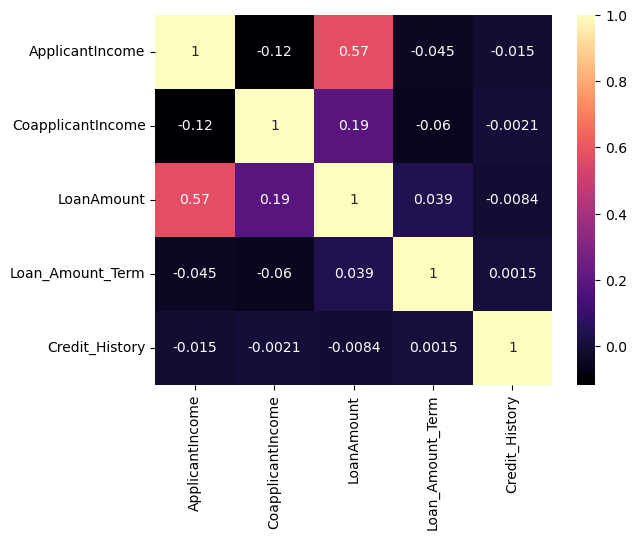

In [17]:
sns.heatmap(train_data.corr(), annot=True, cmap="magma")


`LoanAmount` and `ApplicationIncome` are highly correlated.


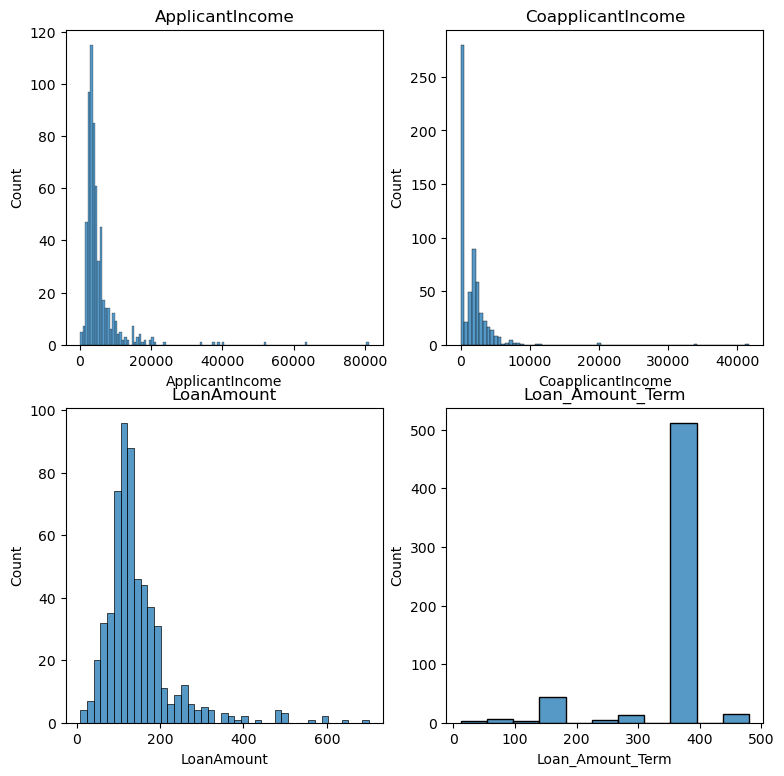

In [18]:
plt.figure(figsize=(9, 9))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_data[col])
    plt.title(str(col))

plt.show()

In [19]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

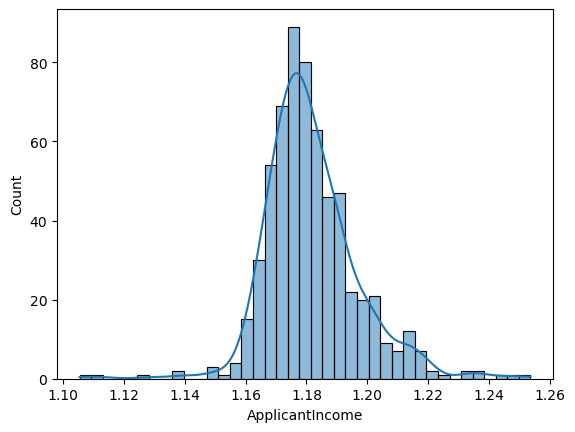

In [20]:
sns.histplot(np.power(train_data["ApplicantIncome"], 1 / 50), kde=True)
plt.show()

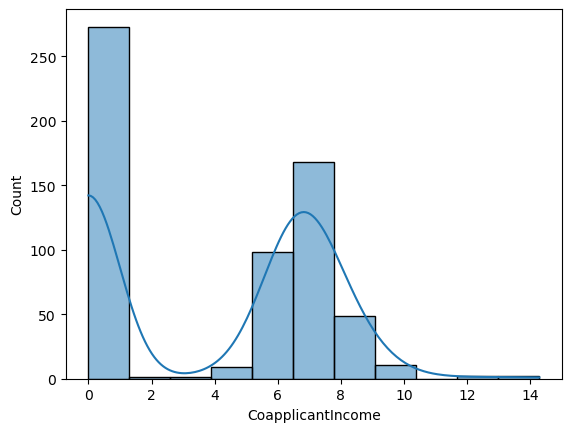

In [21]:
sns.histplot(np.power(train_data["CoapplicantIncome"], 1 / 4), kde=True)
plt.show()

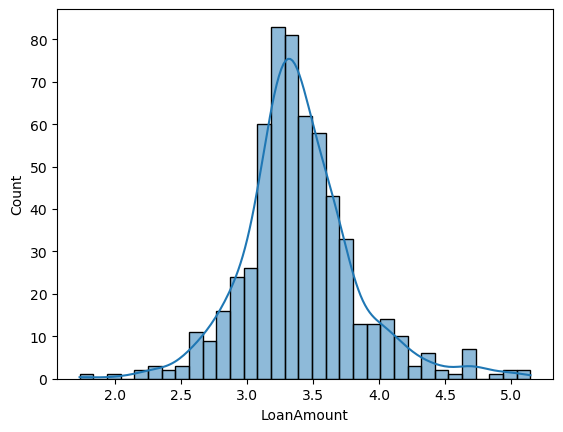

In [22]:
sns.histplot(np.power(train_data["LoanAmount"], 1 / 4), kde=True)
plt.show()

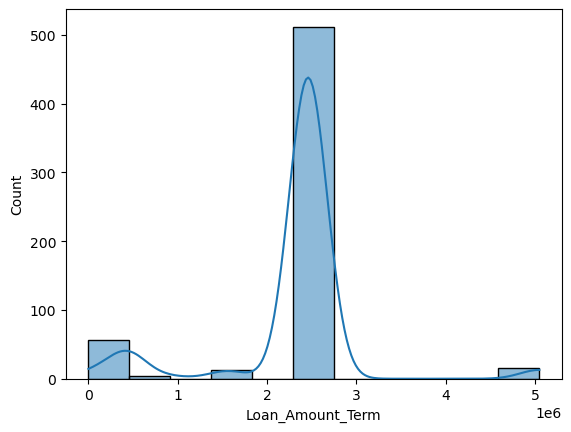

In [23]:
sns.histplot(np.power(train_data["Loan_Amount_Term"], 2.5), kde=True)
plt.show()

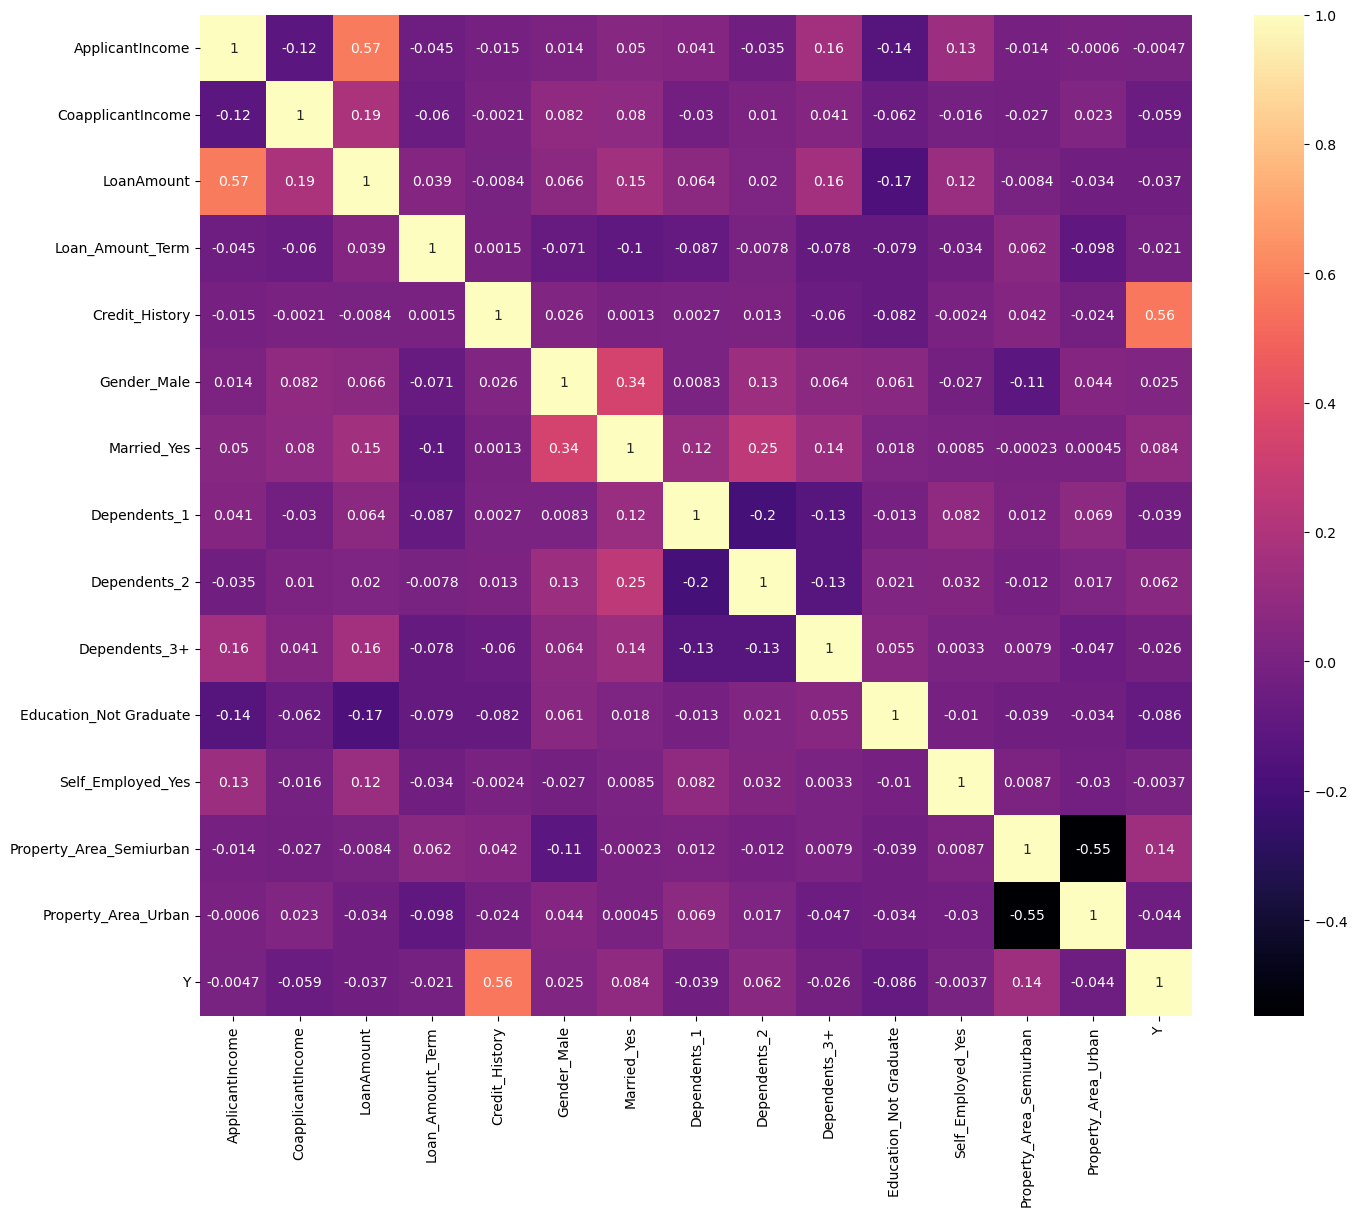

In [24]:
plt.figure(figsize=(16, 13))
sns.heatmap(
    train_data[num_cols]
    .join(pd.get_dummies(train_data[cat_cols], drop_first=True))
    .join(pd.get_dummies(train_data["Loan_Status"], drop_first=True))
    .corr(),
    annot=True,
    cmap="magma",
)
plt.show()


`Credit_History` is the independent variable with the most correlation to the target variable `Loan_Status` (`Y` in this case).


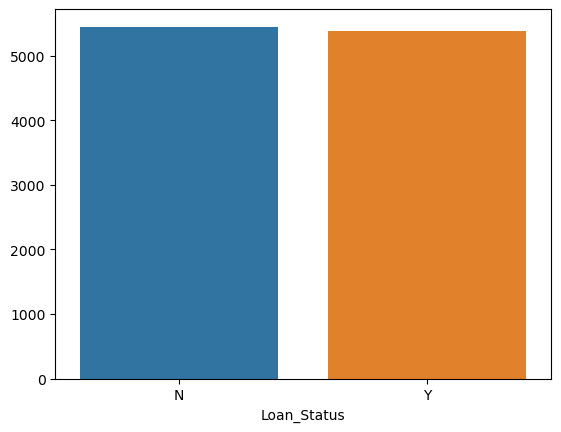

In [25]:
# Loan_Status doesn't have much group separability wrt mean of ApplicantIncome

app_inc = train_data.groupby("Loan_Status")["ApplicantIncome"].mean()
sns.barplot(x=app_inc.index, y=app_inc.values)
plt.show()

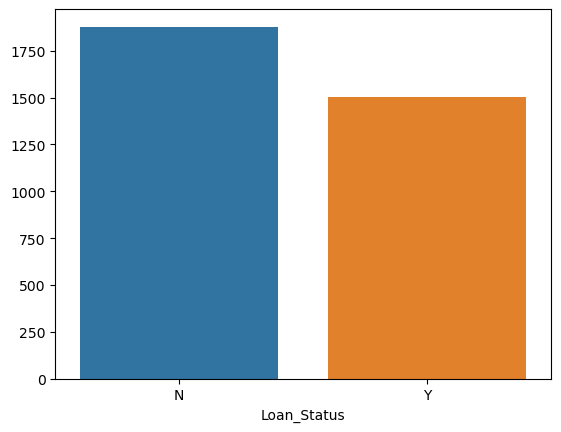

In [26]:
# Whereas Loan_Status does have group separability wrt mean of CoapplicantIncome
# That was a bit unexpected

coapp_inc = train_data.groupby("Loan_Status")["CoapplicantIncome"].mean()
sns.barplot(x=coapp_inc.index, y=coapp_inc.values)
plt.show()

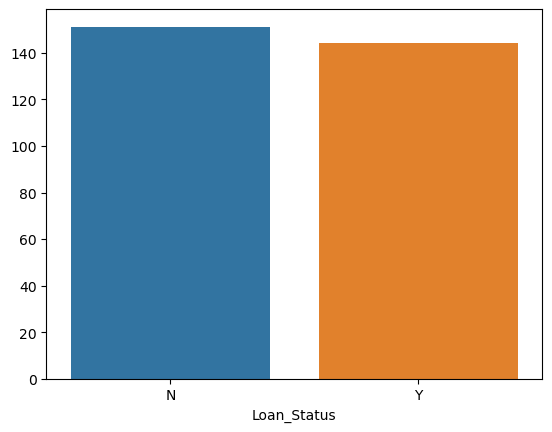

In [27]:
# Loan_Status does have small group separability wrt mean of LoanAmount
# Smaller the loan amount, more chance of getting accepted but not by much.

loan_amt = train_data.groupby("Loan_Status")["LoanAmount"].mean()
sns.barplot(x=loan_amt.index, y=loan_amt.values)
plt.show()

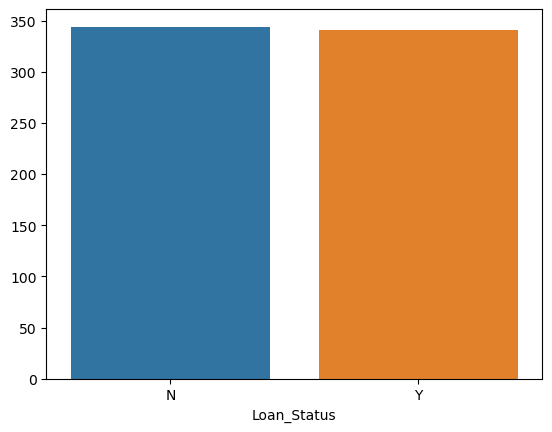

In [28]:
# Loan_Status doesnt have group separability wrt mean of Loan_Amount_Term

loan_sts = train_data.groupby("Loan_Status")["Loan_Amount_Term"].mean()
sns.barplot(x=loan_sts.index, y=loan_sts.values)
plt.show()

In [29]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

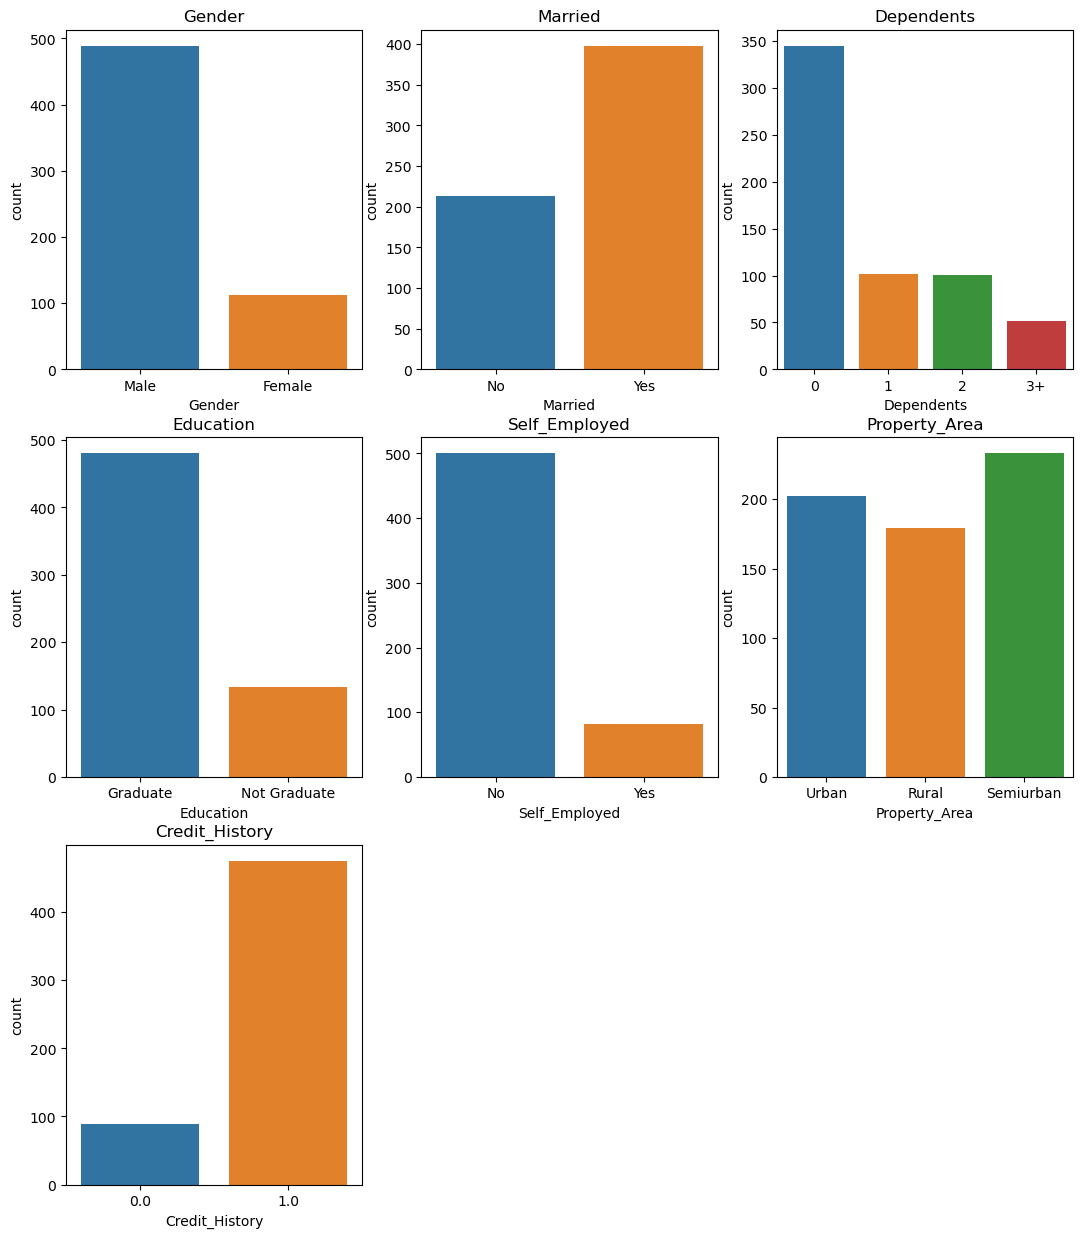

In [30]:
plt.figure(figsize=(13, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=train_data[col])
    plt.title(col)

plt.show()


In [31]:
train_data["Loan_Status"].head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# Data Preprocessing


In [32]:
# Dividing train data into independent and dependent variables
X = train_data.drop(["Loan_ID", "Loan_Status"], axis=1)
y = train_data["Loan_Status"]


In [33]:
X.sample(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
404,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural
430,Female,No,1,Graduate,Yes,8624,0.0,150.0,360.0,1.0,Semiurban


In [34]:
# Splitting into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.75, random_state=39
)

In [35]:
# Imputing missing values using Simple Imputer
from sklearn.impute import SimpleImputer

# Numerical columns
si1 = SimpleImputer(strategy="median")
X_train[["LoanAmount", "Loan_Amount_Term"]] = si1.fit_transform(
    X_train[["LoanAmount", "Loan_Amount_Term"]]
)
X_valid[["LoanAmount", "Loan_Amount_Term"]] = si1.transform(
    X_valid[["LoanAmount", "Loan_Amount_Term"]]
)

# Categorical columns
si2 = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = si2.fit_transform(X_train[cat_cols])
X_valid[cat_cols] = si2.transform(X_valid[cat_cols])

In [36]:
X_train.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [37]:
X_valid.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [38]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Ordinal encoding
cat = [["0", "1", "2", "3+"], ["Not Graduate", "Graduate"]]
oe = OrdinalEncoder(categories=cat)
X_train[["Dependents", "Education"]] = oe.fit_transform(
    X_train[["Dependents", "Education"]]
)
X_valid[["Dependents", "Education"]] = oe.transform(
    X_valid[["Dependents", "Education"]]
)

# One hot encoding
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
train_ohe = ohe.fit_transform(
    X_train[["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"]]
)
test_ohe = ohe.transform(
    X_valid[["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"]]
)

In [39]:
X_train.drop(
    ["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"],
    inplace=True,
    axis=1,
)
X_valid.drop(
    ["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"],
    inplace=True,
    axis=1,
)

In [40]:
ohe.get_feature_names_out()


array(['Gender_Male', 'Married_Yes', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_1.0'], dtype=object)

In [41]:
X_train.shape


(460, 6)

In [42]:
X_train = X_train.join(
    pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(), index=X_train.index)
)
X_valid = X_valid.join(
    pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(), index=X_valid.index)
)

In [43]:
X_train.head()


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
72,0.0,1.0,3500,0.0,81.0,300.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,3000,0.0,66.0,360.0,1.0,1.0,1.0,0.0,1.0,1.0
210,0.0,1.0,10000,0.0,214.0,360.0,0.0,0.0,0.0,1.0,0.0,1.0
440,0.0,1.0,3660,5064.0,187.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0
509,1.0,1.0,13262,0.0,40.0,360.0,0.0,0.0,0.0,0.0,1.0,1.0


In [44]:
# Standardization of numerical variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(ss.transform(X_valid), columns=X_train.columns)


In [45]:
X_train.head()


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,-0.740030,0.55056,-0.289528,-0.713443,-0.717731,-0.604530,0.451872,-1.375893,-0.391002,1.252930,-0.681886,0.412896
1,-0.740030,0.55056,-0.364952,-0.713443,-0.888289,0.287909,0.451872,0.726801,2.557535,-0.798129,1.466521,0.412896
2,-0.740030,0.55056,0.690984,-0.713443,0.794556,0.287909,-2.213015,-1.375893,-0.391002,1.252930,-0.681886,0.412896
3,-0.740030,0.55056,-0.265392,1.576975,0.487551,0.287909,0.451872,-1.375893,-0.391002,1.252930,-0.681886,0.412896
4,0.238171,0.55056,1.183050,-0.713443,-1.183924,0.287909,-2.213015,-1.375893,-0.391002,-0.798129,1.466521,0.412896


In [46]:
X_train.shape


(460, 12)

In [47]:
# Label encoding the categorical variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)


# Modelling


In [48]:
# from sklearn.linear_model import LogisticRegression

# model1 = LogisticRegression()
# model1.fit(X_train, y_train)

# predictions1 = model1.predict(X_valid)


In [49]:
# from sklearn.metrics import accuracy_score, classification_report

# pred = predictions1
# print("Accuracy is :", accuracy_score(y_valid, pred))
# print("Classification record: \n", classification_report(y_valid, pred))


In [50]:
# from sklearn.svm import SVC

# model2 = SVC()
# model2.fit(X_train, y_train)

# predictions2 = model1.predict(X_valid)


In [51]:
# pred = predictions2
# print("Accuracy is :", accuracy_score(y_valid, pred))
# print("Classification record: \n", classification_report(y_valid, pred))


In [52]:
# from sklearn.tree import DecisionTreeRegressor

# model3 = DecisionTreeRegressor()
# model3.fit(X_train, y_train)

# predictions3 = model3.predict(X_valid)


In [53]:
# pred = predictions3
# print("Accuracy is :", accuracy_score(y_valid, pred))
# print("Classification record: \n", classification_report(y_valid, pred))


In [54]:
# from sklearn.ensemble import RandomForestClassifier

# model4 = RandomForestClassifier(n_estimators=100, max_depth=7)
# model4.fit(X_train, y_train)

# predictions4 = model4.predict(X_valid)


In [55]:
# pred = predictions4
# print("Accuracy is :", accuracy_score(y_valid, pred))
# print("Classification record: \n", classification_report(y_valid, pred))


In [56]:
# model5 = SVC(kernel='rbf')
# model5.fit(X_train, y_train)

# predictions5 = model5.predict(X_valid)


In [57]:
# pred = predictions5
# print("Accuracy is :", accuracy_score(y_valid, pred))
# print("Classification record: \n", classification_report(y_valid, pred))


Since linear models like svm linear kernel and logistic regression performs better than other models with base hyperparameters, I will choose logistic regression as the final model.


In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2", C=1, random_state=39, solver="liblinear")
model.fit(X_train, y_train)

predictions = model.predict(X_valid)

In [59]:
from sklearn.metrics import accuracy_score, classification_report

pred = predictions
print("Accuracy is :", accuracy_score(y_valid, pred))
print("Classification record: \n", classification_report(y_valid, pred))


Accuracy is : 0.8376623376623377
Classification record: 
               precision    recall  f1-score   support

           0       1.00      0.49      0.66        49
           1       0.81      1.00      0.89       105

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.78       154
weighted avg       0.87      0.84      0.82       154



In [60]:
# from sklearn.model_selection import learning_curve

# train_size, train_scores, test_scores = learning_curve(model, X_train, y_train,
#                train_sizes=np.arange(0.1, 1.1, 0.1),
#                scoring="accuracy",
#                n_jobs=-1,
#                cv=10)


In [61]:
# sns.lineplot(x=train_size,
#              y=np.mean(train_scores, axis=1),
#              label="Train")
# sns.lineplot(x=train_size,
#              y=np.mean(test_scores, axis=1),
#              label="Test")
# plt.xlabel("Train sizes")
# plt.ylabel("Accuracy")
# plt.show()


In [62]:
# from sklearn.model_selection import validation_curve

# train_scores, test_scores = validation_curve(model, X_train, y_train,
#                  param_name="C",
#                  param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10],
#                  cv=10,
#                  scoring="accuracy",
#                  n_jobs=-1)

In [63]:
# sns.lineplot(x=[0.0001, 0.001, 0.01, 0.1, 1, 10],
#              y=np.mean(train_scores, axis=1),
#              label="Train")
# sns.lineplot(x=[0.0001, 0.001, 0.01, 0.1, 1, 10],
#              y=np.mean(test_scores, axis=1),
#              label="Test")
# plt.gca().set_xscale('log')
# plt.xlabel("Different values for C")
# plt.ylabel("Accuracy")
# plt.show()

Preparing the final model starting with preprocessing for whole train data and test data


In [64]:
# Imputing missing values using Simple Imputer
from sklearn.impute import SimpleImputer

# Numerical columns
si1 = SimpleImputer(strategy="median")
X[["LoanAmount", "Loan_Amount_Term"]] = si1.fit_transform(
    X[["LoanAmount", "Loan_Amount_Term"]]
)
test_data[["LoanAmount", "Loan_Amount_Term"]] = si1.transform(
    test_data[["LoanAmount", "Loan_Amount_Term"]]
)

# Categorical columns
si2 = SimpleImputer(strategy="most_frequent")
X[cat_cols] = si2.fit_transform(X[cat_cols])
test_data[cat_cols] = si2.transform(test_data[cat_cols])

In [65]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Ordinal encoding
cat = [["0", "1", "2", "3+"], ["Not Graduate", "Graduate"]]
oe = OrdinalEncoder(categories=cat)
X[["Dependents", "Education"]] = oe.fit_transform(X[["Dependents", "Education"]])
test_data[["Dependents", "Education"]] = oe.transform(
    test_data[["Dependents", "Education"]]
)

# One hot encoding
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
train_ohe = ohe.fit_transform(
    X[["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"]]
)
test_ohe = ohe.transform(
    test_data[["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"]]
)

In [66]:
X.drop(
    ["Gender", "Married", "Self_Employed", "Property_Area", "Credit_History"],
    inplace=True,
    axis=1,
)
test_data.drop(
    [
        "Loan_ID",
        "Gender",
        "Married",
        "Self_Employed",
        "Property_Area",
        "Credit_History",
    ],
    inplace=True,
    axis=1,
)

In [67]:
X = X.join(pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(), index=X.index))
test_data = test_data.join(
    pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(), index=test_data.index)
)

In [68]:
# Standardization of numerical variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X[num_cols] = ss.fit_transform(X[num_cols])
test_data[num_cols] = ss.transform(test_data[num_cols])


In [69]:
X.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,0.0,1.0,0.072991,-0.554487,-0.211241,0.273231,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,-0.134412,-0.038732,-0.211241,0.273231,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,-0.393747,-0.554487,-0.948996,0.273231,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,-0.462062,0.251980,-0.306435,0.273231,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.097728,-0.554487,-0.056551,0.273231,1.0,0.0,0.0,0.0,1.0,1.0


In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [71]:
# Fine tuning using grid search cv

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

param_grid = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]}

gs = GridSearchCV(model, param_grid=param_grid, cv=5,
                  n_jobs=-1, scoring="accuracy")
gs.fit(X, y)

print("Best score: ", gs.best_score_)
print("Best parameters: ", gs.best_params_)


Best score:  0.809462881514061
Best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1, penalty="l2")
lr.fit(X, y)

predictions = lr.predict(test_data)


In [77]:
predictions = le.inverse_transform(predictions)
predictions


array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [78]:
submission_data["Loan_Status"] = predictions

In [79]:
submission_data.sample(10)

,Loan_ID,Loan_Status
9,LP001067,Y
261,LP002420,Y
210,LP002167,Y
102,LP001547,Y
302,LP002654,Y
357,LP002952,Y
30,LP001177,Y
134,LP001737,Y
28,LP001174,Y
231,LP002298,Y


In [80]:
submission_data.to_csv("submission.csv", index=False)
